# K-Means Clustering Single and complete Link-21MIS1128

## Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns

## Reading dataset using read_csv method and displaying the top 5 rows of dataset for visualizing.

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Its easy to do clustering with 3 or 4 features, if we consider all the features in the dataset it becomes increasingly difficult to cluster the data.

## So we are considering 3 features which are longitude, latitude and house value because longitude and latitude helps in clustering the prices based on geographical locations

In [3]:
data = pd.read_csv('housing.csv',usecols = ['longitude', 'latitude', 'median_house_value'])
data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


## Visualization of data

### We will visualize the housing data. We look at the location data with a heatmap based on the median price in a block. the points which have dark color they are considered as high value and for our understanding we will consider different locations in california.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

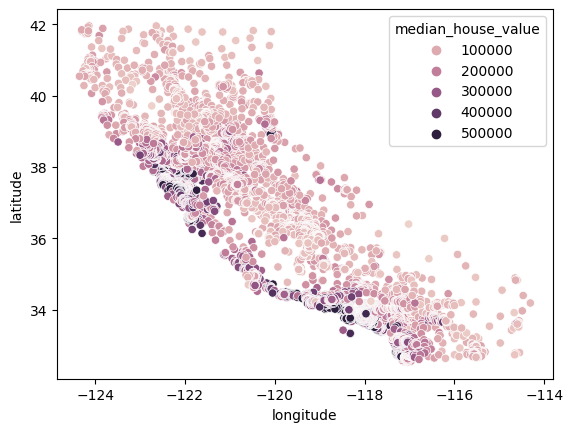

In [4]:
sns.scatterplot(data = data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

## Data Normalization

### When working with distance-based algorithms, like k-Means Clustering, we must normalize the data. If we do not normalize the data, variables with different scaling will be weighted differently in the distance formula that is being optimized during training.

### Splitting the data into test and train dataset using skilearn kit.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['latitude', 'longitude']], data[['median_house_value']], test_size=0.30, random_state=0)

### Next, we will normalize the training and test data using the preprocessing.normalize() method from sklearn. 

In [6]:
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

## Model fitting and Evaluation

### We are importing the kmeans function from sklearn where we have to specify the no.of clusters and n_init that means no.of iterations the algorithm runs with different centroid points and also took k as 3 for assumption and next will perform with different k values to find best k value.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init=10) # default value of n_init is 10
kmeans.fit(X_train_norm)


KMeans(n_clusters=2, random_state=0)

### Once the data are fit, we can access labels from the labels_ attribute. Below, we visualize the data we just fit. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

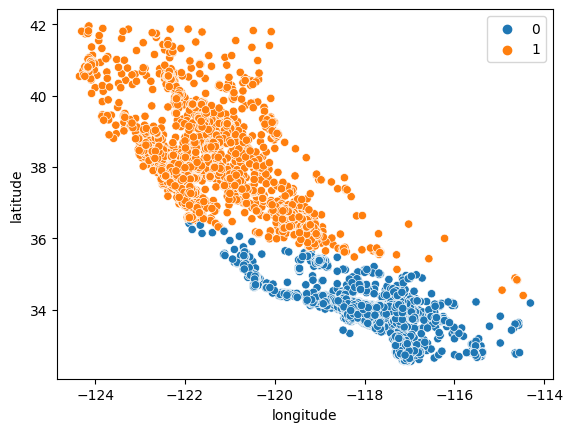

In [8]:
 sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

### We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). The location names are just taken as assumptions to make the visualization clear.

## We will create a box plot to look at the distribution of median house value based on these 3 groups(Northern,Southern and central california).

<AxesSubplot:ylabel='median_house_value'>

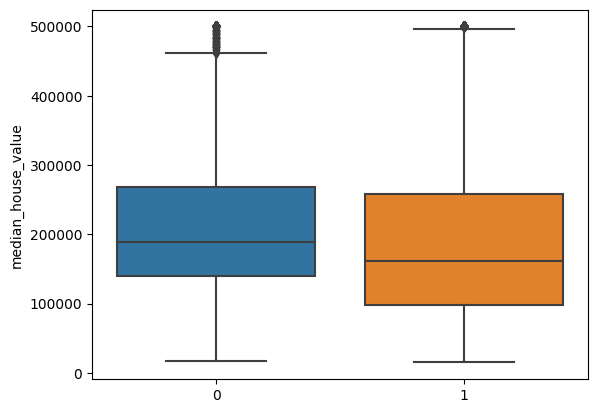

In [9]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

### We can clearly see that the Northern and Southern clusters have similar distributions of median house values (clusters 0 and 2) that are higher than the prices in the central cluster (cluster 1). 

## We will check the performance using silhouette score from sklearn, if the score is near to 1 which is best fit and good performance.

In [10]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7745981229879931

## Finding the best K value is important thing and below there is a for loop created for finding best K value.

In [11]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

### For K=2

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

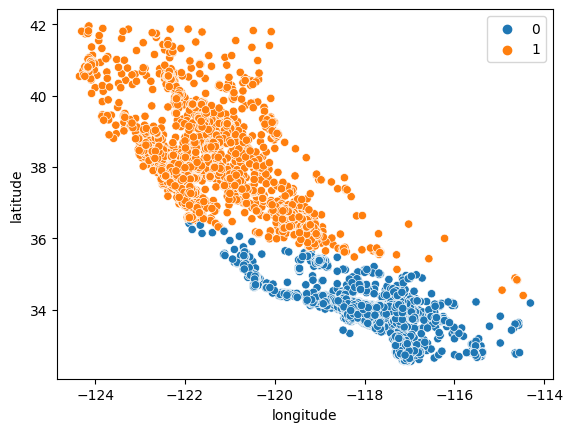

In [12]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

### For K=4

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

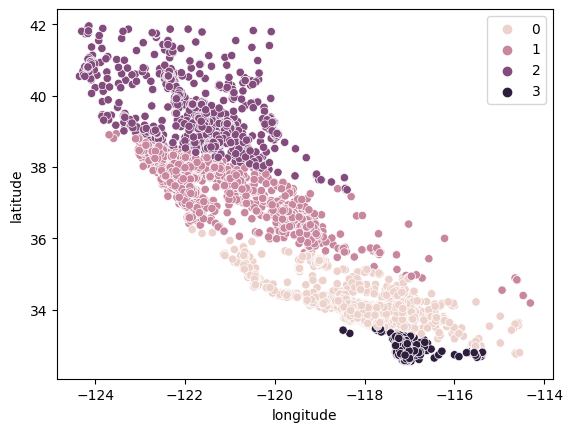

In [13]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

### For K=7

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

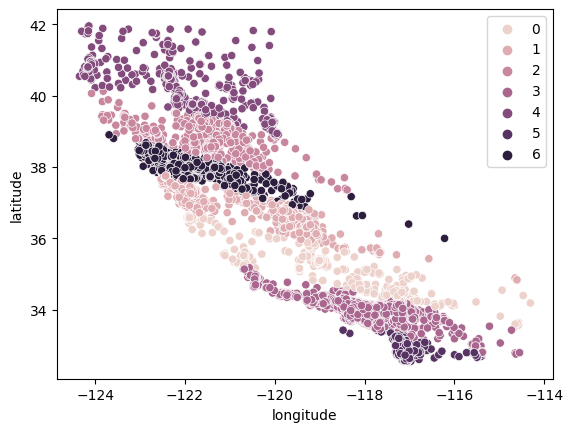

In [14]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)

<AxesSubplot:>

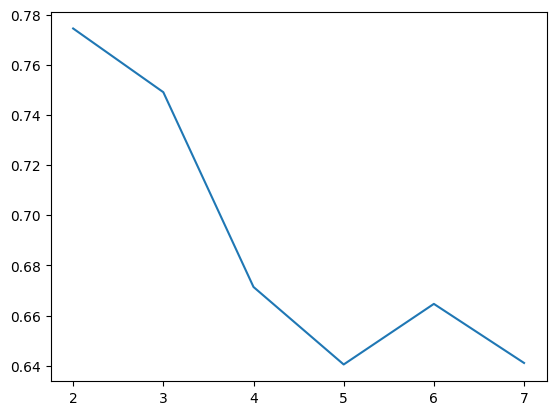

In [15]:
sns.lineplot(x = K, y = score)

### We typically choose the point where the improvements in performance start to flatten or get worse. We see k = 5 is probably the best we can do without overfitting. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

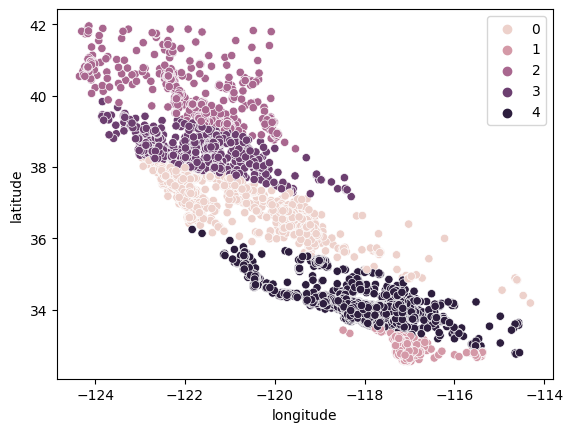

In [16]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

## We can also see that the clusters do a relatively good job of breaking California into distinct clusters and these clusters map relatively well to different price ranges as seen above. 

<AxesSubplot:ylabel='median_house_value'>

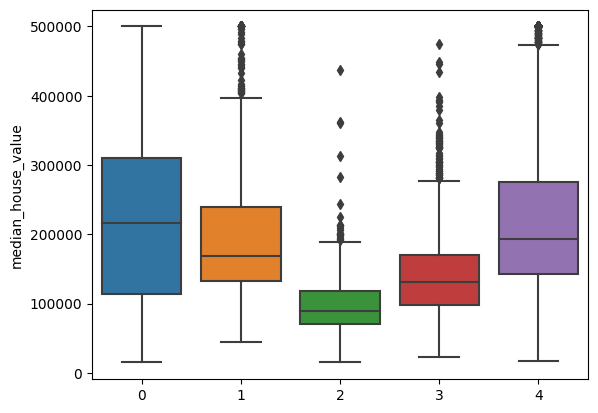

In [17]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

## From the box plot we can see there are 5 clusters in which we can infer the mean value of cluster 0,1 and 4 are becoming more valuable than other two clusters.

## Finding the closest points between two clusters

In [18]:
import numpy as np

def find_closest_points(X, labels):
    clusters = {i: X[labels == i] for i in range(np.max(labels) + 1)}
    
    min_distance = np.inf
    closest_points = (None, None)
    
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            for point1 in clusters[i]:
                for point2 in clusters[j]:
                    distance = np.linalg.norm(point1 - point2)
                    if distance < min_distance:
                        min_distance = distance
                        closest_points = (point1, point2)
    
    return closest_points

# Example usage:
# closest_points = find_closest_points(X_norm, kmeans.labels_)
closest_points = find_closest_points(X_train.values, kmeans.labels_)
print(closest_points)

(array([  36.49, -121.88]), array([  36.52, -121.84]))


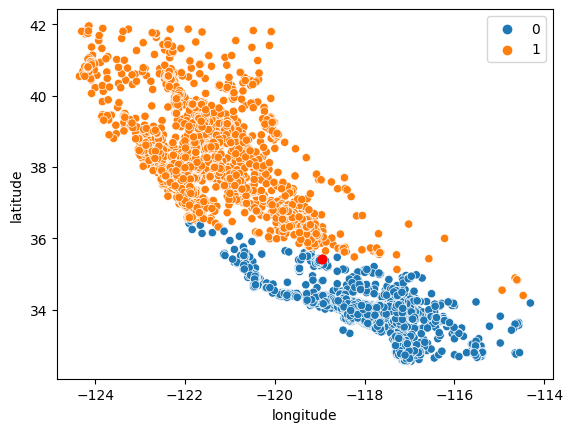

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing scatter plot
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

# Your points
points = [np.array([ -118.96, 35.41]), np.array([ -118.96, 35.41])]

# Plotting the points
for point in points:
    plt.scatter(*point, color='red')  # plots each point in red color

plt.show()


## Finding furthest points between two clusters

In [20]:
import numpy as np

def find_furthest_points(X, labels):
    clusters = {i: X[labels == i] for i in range(np.max(labels) + 1)}
    
    max_distance = -np.inf
    furthest_points = (None, None)
    
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            for point1 in clusters[i]:
                for point2 in clusters[j]:
                    distance = np.linalg.norm(point1 - point2)
                    if distance > max_distance:
                        max_distance = distance
                        furthest_points = (point1, point2)
    
    return furthest_points

# Example usage:
furthest_points = find_furthest_points(X_train.values, kmeans.labels_)
print(furthest_points)


(array([  32.8 , -114.55]), array([  41.8, -124.3]))


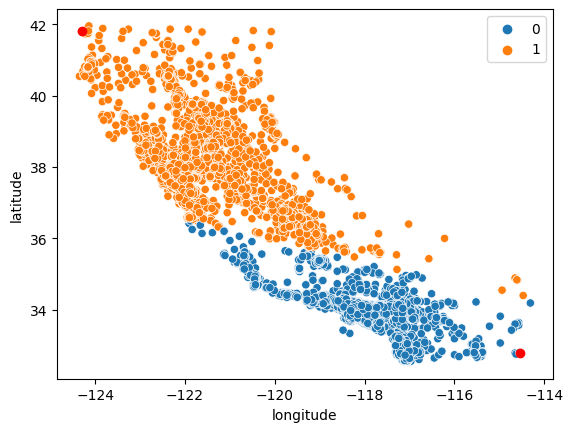

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing scatter plot
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

# Your points
points = [np.array([ -114.55, 32.8]), np.array([ -124.3, 41.8])]

# Plotting the points
for point in points:
    plt.scatter(*point, color='red')  # plots each point in red color

plt.show()


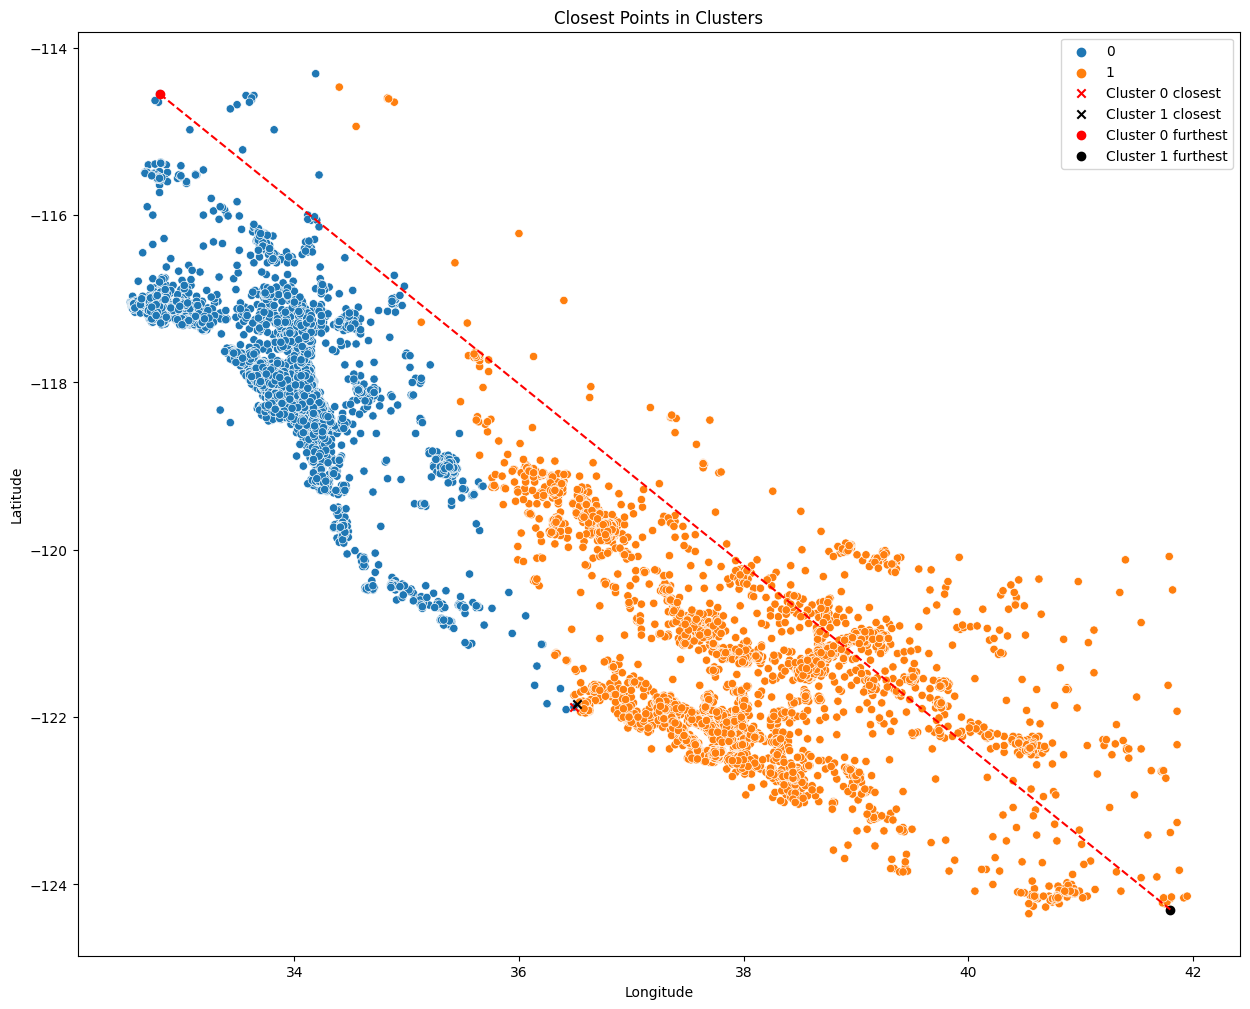

In [22]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(15, 12))
sns.scatterplot(data = X_train, x = 'latitude', y = 'longitude', hue = kmeans.labels_)
plt.scatter(closest_points[0][0], closest_points[0][1], color='red', marker='x', label="Cluster 0 closest")
plt.scatter(closest_points[1][0], closest_points[1][1], color='black', marker='x', label="Cluster 1 closest")
plt.scatter(furthest_points[0][0] , furthest_points[0][1], color='red', label="Cluster 0 furthest")
plt.scatter(furthest_points[1][0], furthest_points[1][1], color='black', label="Cluster 1 furthest")

plt.plot([closest_points[0][0], closest_points[1][0]], [closest_points[0][1], closest_points[1][1]], '--', color='black')
plt.plot([furthest_points[0][0], furthest_points[1][0]], [furthest_points[0][1], furthest_points[1][1]], '--', color='red')

plt.title('Closest Points in Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Final Interpretation

### 1) From this experiment i learned how to cluster the data into multiple groups based on some parameters by finding the best K value.

### 2) Used ssilhouette score for evaluationg the performance and got 0.74 as score which means high performance as the score is very near to 1.

### 3)used different K-values and plotted ssilhouette score and found best k-value.

### 4) Finally used box plot for visualizing the distribution of mean house value among the 5 clusters.